Name: Emir Alper Yildiz

ID: 201101004

Course: BIL570 /BIL470

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sklM
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from lineerRegression import lineerRegression

# Exploratory Data Analysis (EDA) for IRIS

In [2]:
dataset = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')

#Gender column will not be used.
dataset.drop('Gender', axis=1, inplace=True)

<h3> DATASET SUMMARY!!

In [3]:
print("Info for dataset\n")
print(dataset.info())
print('='*30)

print("\nShape is: ", str(dataset.shape) + "\n")
print('='*30)

print("First five elements", end='')
display(dataset.head())
print('='*30)

print("\nNull values of table")
display(dataset.isnull().sum())
print('='*30)

print("\nGeneral info of dataset", end='')
display(dataset.describe())
print('='*30)

print("\nDuplicate values", end='')
dup_sum = dataset.duplicated().sum()
if(dup_sum == 0):
    print("\nThere is no duplicate values.")
else:
    display(dataset[dataset.duplicated()])
    display(dup_sum)

print('='*30)
print("\nFrequency of Index:\n" + dataset['Index'].value_counts().to_string())

Info for dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Height  500 non-null    int64
 1   Weight  500 non-null    int64
 2   Index   500 non-null    int64
dtypes: int64(3)
memory usage: 11.8 KB
None

Shape is:  (500, 3)

First five elements

,Height,Weight,Index
0,174,96,4
1,189,87,2
2,185,110,4
3,195,104,3
4,149,61,3



Null values of table


Height    0
Weight    0
Index     0
dtype: int64


General info of dataset

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000



Duplicate values

,Height,Weight,Index
20,157,110,5
162,192,101,3
187,182,84,3
197,177,117,4
260,159,104,5
310,171,147,5
321,181,111,4
327,167,85,4
334,157,56,2
347,162,58,2


24


Frequency of Index:
5    198
4    130
2     69
3     68
1     22
0     13


<h3>DATASET DISTRIBUTION

General distribution.


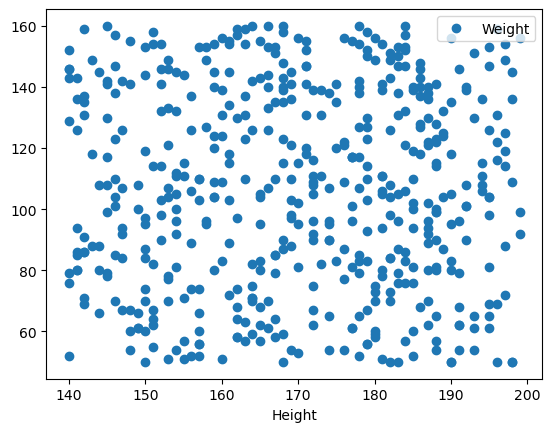

Distribution of features with index.


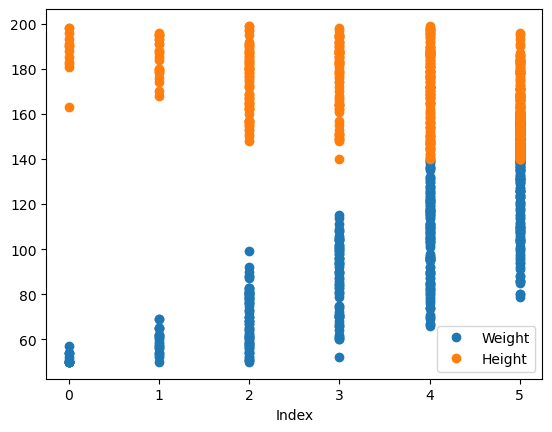

Distribution of features by itself.


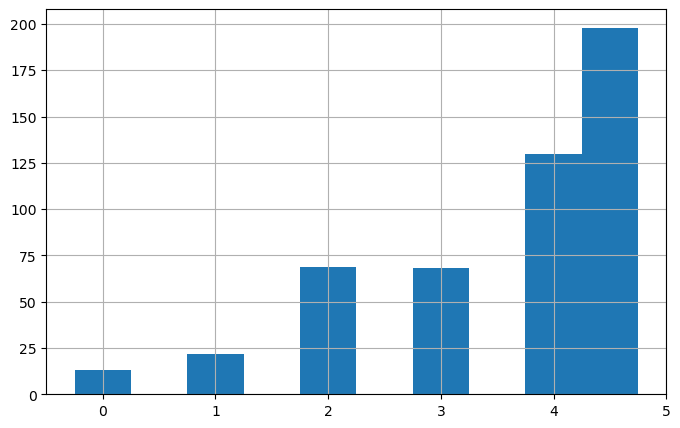

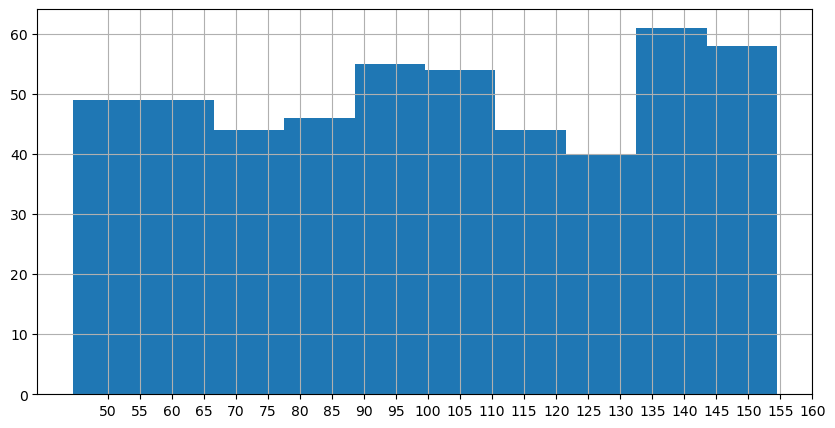

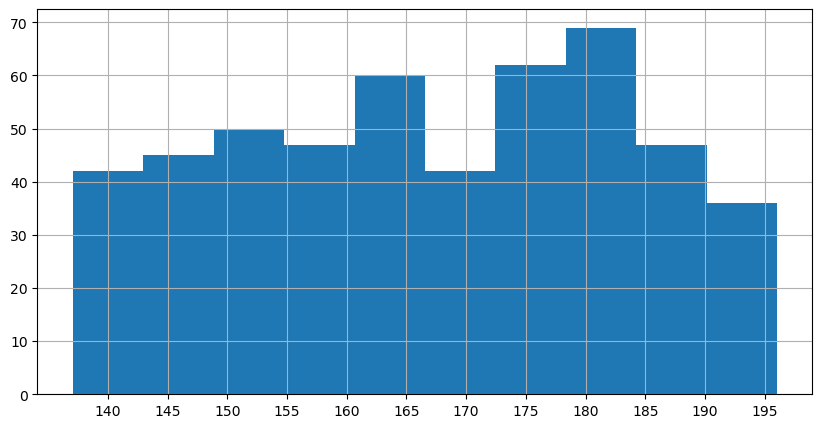

In [4]:
print("General distribution.")
dataset.plot(x='Height', y='Weight', style='o')
plt.show()

print("Distribution of features with index.")

dataset.plot(x='Index', y=['Weight', 'Height'], style='o')
plt.show()


print("Distribution of features by itself.")

dataset['Index'].hist(figsize=(8,5), align='left')
plt.xticks(np.arange(min(dataset['Index']), max(dataset['Index'])+1, 1.0))
plt.show()

############

dataset['Weight'].hist(figsize=(10,5), align='left')
plt.xticks(np.arange(min(dataset['Weight']), max(dataset['Weight'])+1, 5.0))
plt.show()

############

dataset['Height'].hist(figsize=(10,5), align='left')
plt.xticks(np.arange(min(dataset['Height']), max(dataset['Height'])+1, 5.0))
plt.show()

<h3> DATASET CORRELATION MATRIX

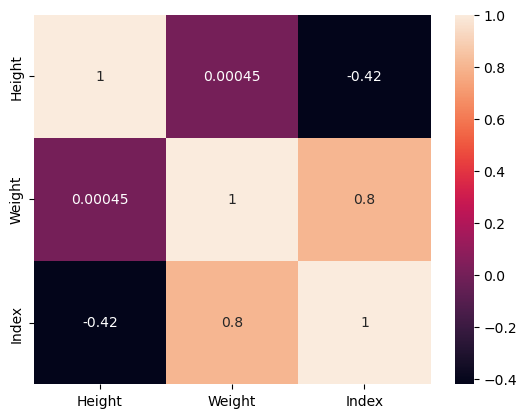

In [5]:
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

<h3> DATASET PAIR-PLOTS FOR FEATURES

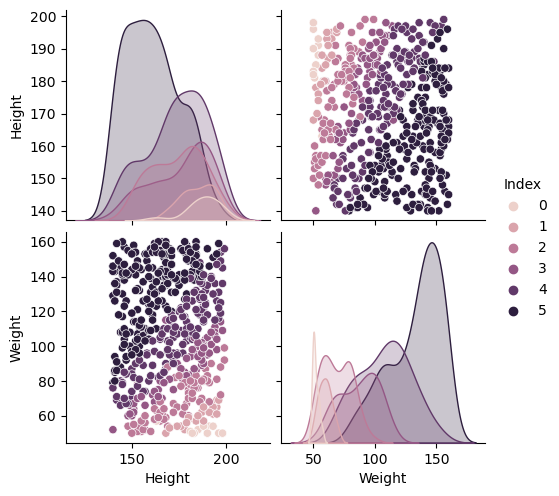

In [6]:
sns.pairplot(dataset, hue="Index")

# Train the classifier

In [7]:
clf = lineerRegression()

Split dataset to train and test

In [8]:
features=dataset.values.tolist()
targets=[]
for row in features:
    targets.append(int(row[2]))
    del row[2]
features=pd.Series(features)
targets=pd.Series(targets)
feature_train, feature_test, target_train, target_test = train_test_split(features, targets, test_size=0.5, shuffle=True)

feature_train_list=feature_train.values.tolist()
target_train_list=target_train.values.tolist()

feature_test_list=feature_test.values.tolist()
target_test_list=target_test.values.tolist()

### Train The Classifier

In [9]:
clf.fit(feature_train_list, target_train_list, feature_test_list, target_test_list)

### Predict Class of Test values

In [10]:
target_predictions, prediction_loss, prediction_accuracy = clf.predict(feature_test_list)

check_predictions, _, __= clf.predict(feature_train_list)

# Results

### Accuracy Calculation

<h4>Accuracy of Test Data

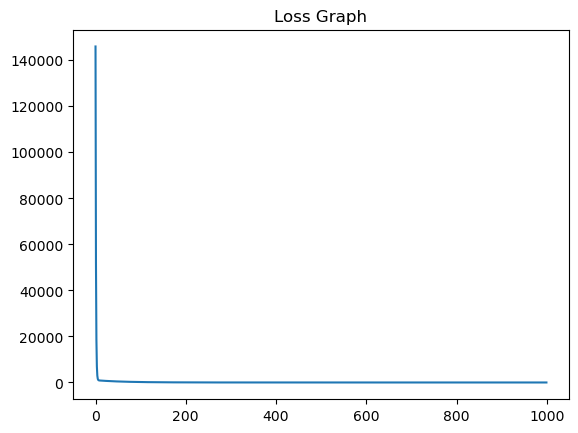

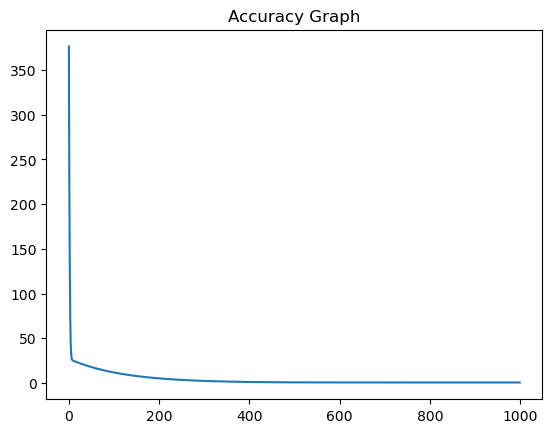

Since we observe similar behave as log function, I'll apply log function to every element of list.


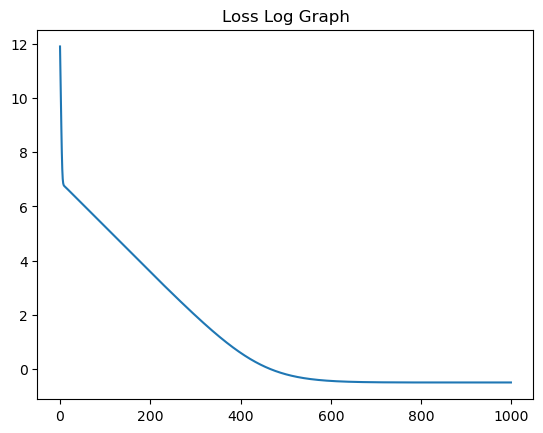

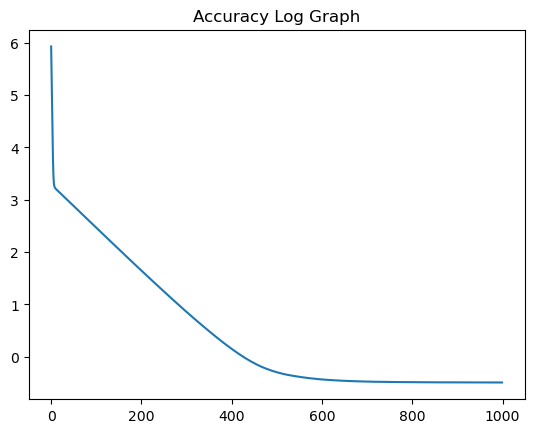

Another plotting would be possible if we cut extra big pieces from the edge.


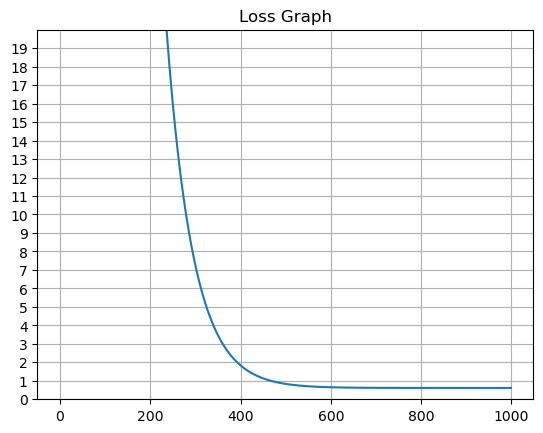

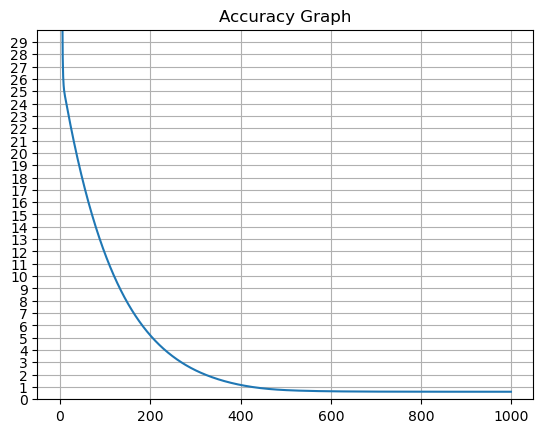

Another observation for loss and accuracy, smaller than one.


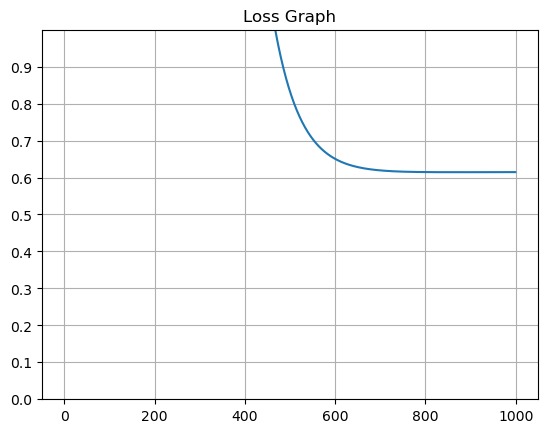

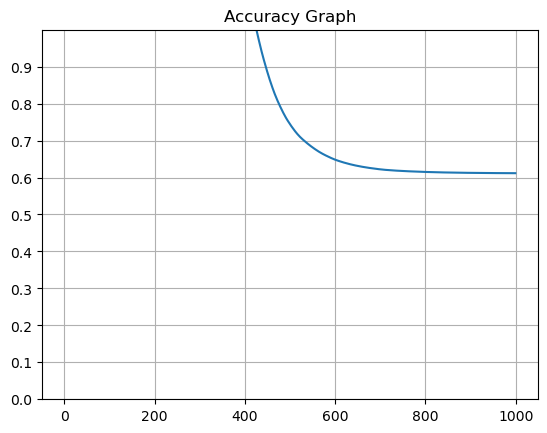

In [11]:
#Note: Based on your reply's in piazza post. I calculate loss and accuracy in fit function.
#Test data act as validation data. During training I calculated loss and accuracy every step.
#So this is independent from prediction.
plt.plot(prediction_loss)
plt.title("Loss Graph")
plt.show()

plt.plot(prediction_accuracy)
plt.title("Accuracy Graph")
plt.show()

print("Since we observe similar behave as log function, I'll apply log function to every element of list.")

prediction_loss_log = [math.log(element) for element in prediction_loss]
prediction_accuracy_log = [math.log(element) for element in prediction_accuracy]

plt.plot(prediction_loss_log)
plt.title("Loss Log Graph")
plt.show()

plt.plot(prediction_accuracy_log)
plt.title("Accuracy Log Graph")
plt.show()

print("Another plotting would be possible if we cut extra big pieces from the edge.")

plt.plot(prediction_loss)
plt.ylim(0, 20)
plt.yticks(np.arange(0, 20, 1))
plt.grid()
plt.title("Loss Graph")
plt.show()

plt.plot(prediction_accuracy)
plt.ylim(0, 30)
plt.yticks(np.arange(0, 30, 1))
plt.grid()
plt.title("Accuracy Graph")
plt.show()

print("Another observation for loss and accuracy, smaller than one.")

plt.plot(prediction_loss)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1, 0.1))
plt.grid()
plt.title("Loss Graph")
plt.show()

plt.plot(prediction_accuracy)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1, 0.1))
plt.grid()
plt.title("Accuracy Graph")
plt.show()

<h4>Accuracy of Training Data

<h3>Accuracy Measurement</h3>
<p>
&emsp;I have used mean absolute error. Reason of me selecting this measurement is to calculate distance between guess and real value. My goal is to measure how far away I get from true answer.</br>

<h3>Analyze Of Results</h3>
<p>
&emsp;I have successfully train the data. Results are looking good. Approximately, 500 epoch is enough for training of this dataset. After nearly 500 epoch, both accuracy and loss is smaller than one. After nearly 600 epoch, the improvement really slows down. None of them shows more improvement anymore as far as we can see from the last two detailed graph.</br>
&emsp;This extra epoch steps increase possibility of overfit. I calculated loss and accuracy from test dataset. Test set act like validation set. From the graphs, overfit do not be observed, but to be safe, 800 epoch is more than enough for this model and data.</br>
</p>